Loading Packages

In [1]:
library(tidyverse)
library(here)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /Users/damienfung/Desktop/git/Spiral-Data-Visualizer


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Taking a look at the data (BC)

In [11]:
data <- read.csv("https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv")
data

pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,⋯,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
35,Ontario,Ontario,2020-01-31,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-01-31,NA,1,0,0,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-01-31,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-08,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-02-08,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-02-08,NA,7,0,0,7,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-16,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-02-16,NA,5,0,0,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-02-16,NA,8,0,0,8,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0


In [3]:
daily_data <- data %>%
    filter(prname == "British Columbia") %>%
    select(date, numtoday) %>%
    mutate(day_of_year = yday(date),
        year = year(date))
head(daily_data)
tail(daily_data)

,date,numtoday,day_of_year,year
,<chr>,<int>,<dbl>,<dbl>
1,2020-01-31,1,31,2020
2,2020-02-08,3,39,2020
3,2020-02-16,1,47,2020
4,2020-02-21,1,52,2020
5,2020-02-24,0,55,2020
6,2020-02-25,1,56,2020


,date,numtoday,day_of_year,year
,<chr>,<int>,<dbl>,<dbl>
685,2022-01-08,2573,8,2022
686,2022-01-09,2287,9,2022
687,2022-01-10,2106,10,2022
688,2022-01-11,2239,11,2022
689,2022-01-12,2612,12,2022
690,2022-01-13,2554,13,2022


Visualizing Basic Data

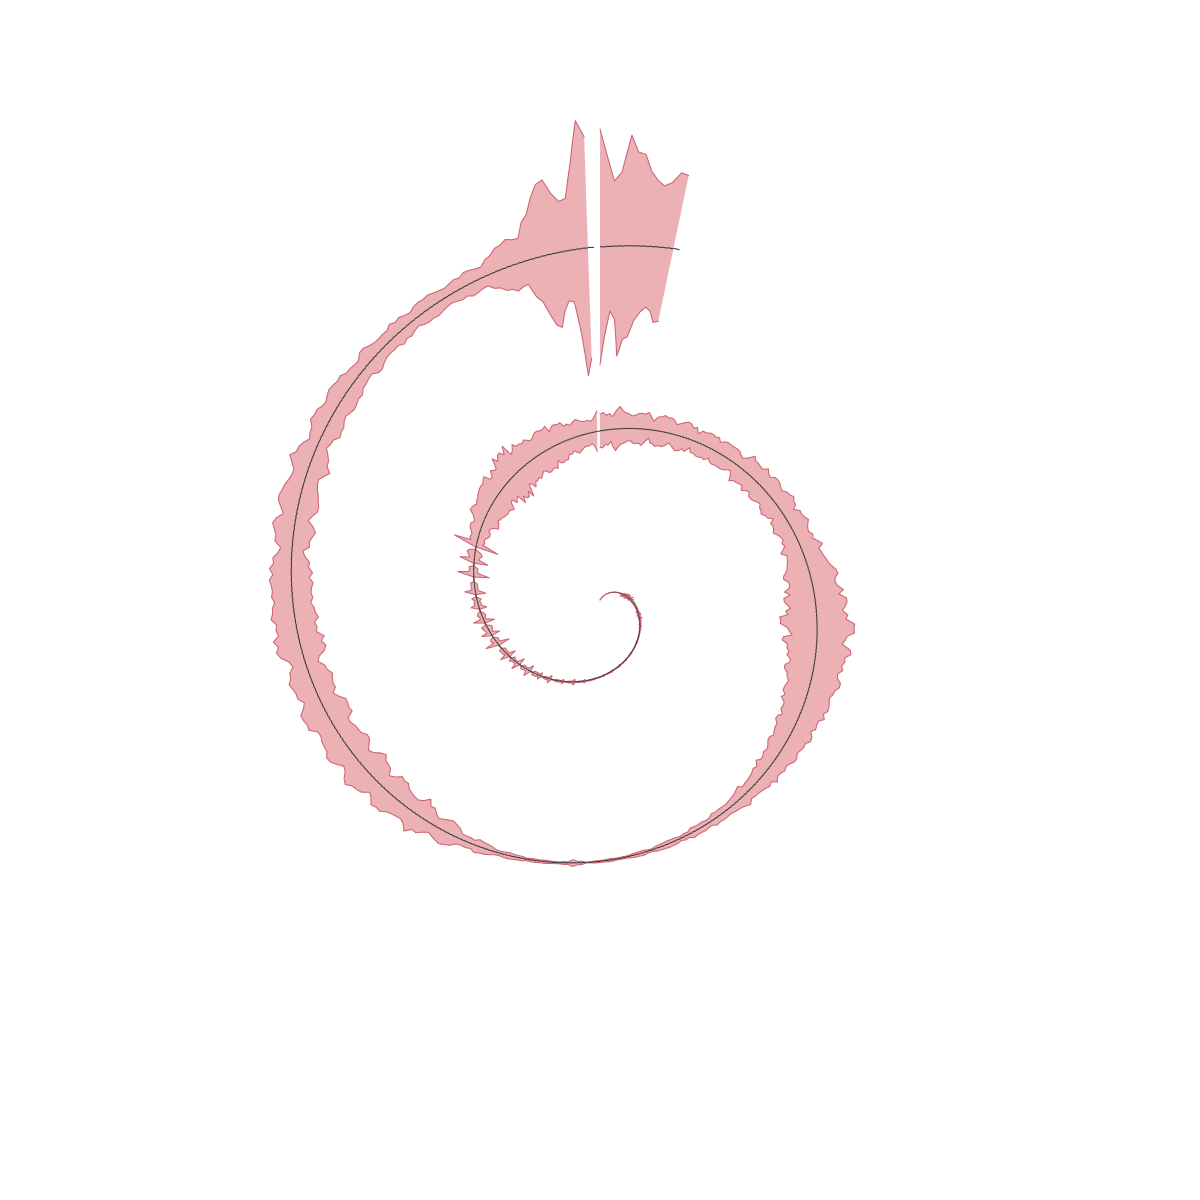

In [7]:
size_factor <- 10000
options(repr.plot.width = 10, repr.plot.height = 10)

# Colors
outline_color <- "#D97C86"
fill_color <- "#F0C0C1"
base_grey <- "grey28"

data_plot <- daily_data %>% 
  ggplot() +
  # area to encode the number of cases
  geom_ribbon(aes(x = day_of_year, 
                  ymin = as.POSIXct(date) - numtoday / 2 * size_factor,
                  ymax = as.POSIXct(date) + numtoday / 2 * size_factor,
                  group = year),
              size = 0.3, col = outline_color, fill = fill_color, show.legend = FALSE) +
  # basic line
  geom_segment(aes(x = day_of_year, xend = day_of_year + 1, 
                   y = as.POSIXct(date), yend = as.POSIXct(date)),
               col = base_grey, size = 0.3) +
  coord_polar() +
  theme_void()
data_plot

Adding Grid Lines

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2020→' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2020→' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2020→' in 'mbcsToSbcs': dot substituted for <92>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2021→' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2021→' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '2021→' in 'mbcsToSbcs': dot substituted for <92>”
Warning message in grid.Call.graphics(C_text, 

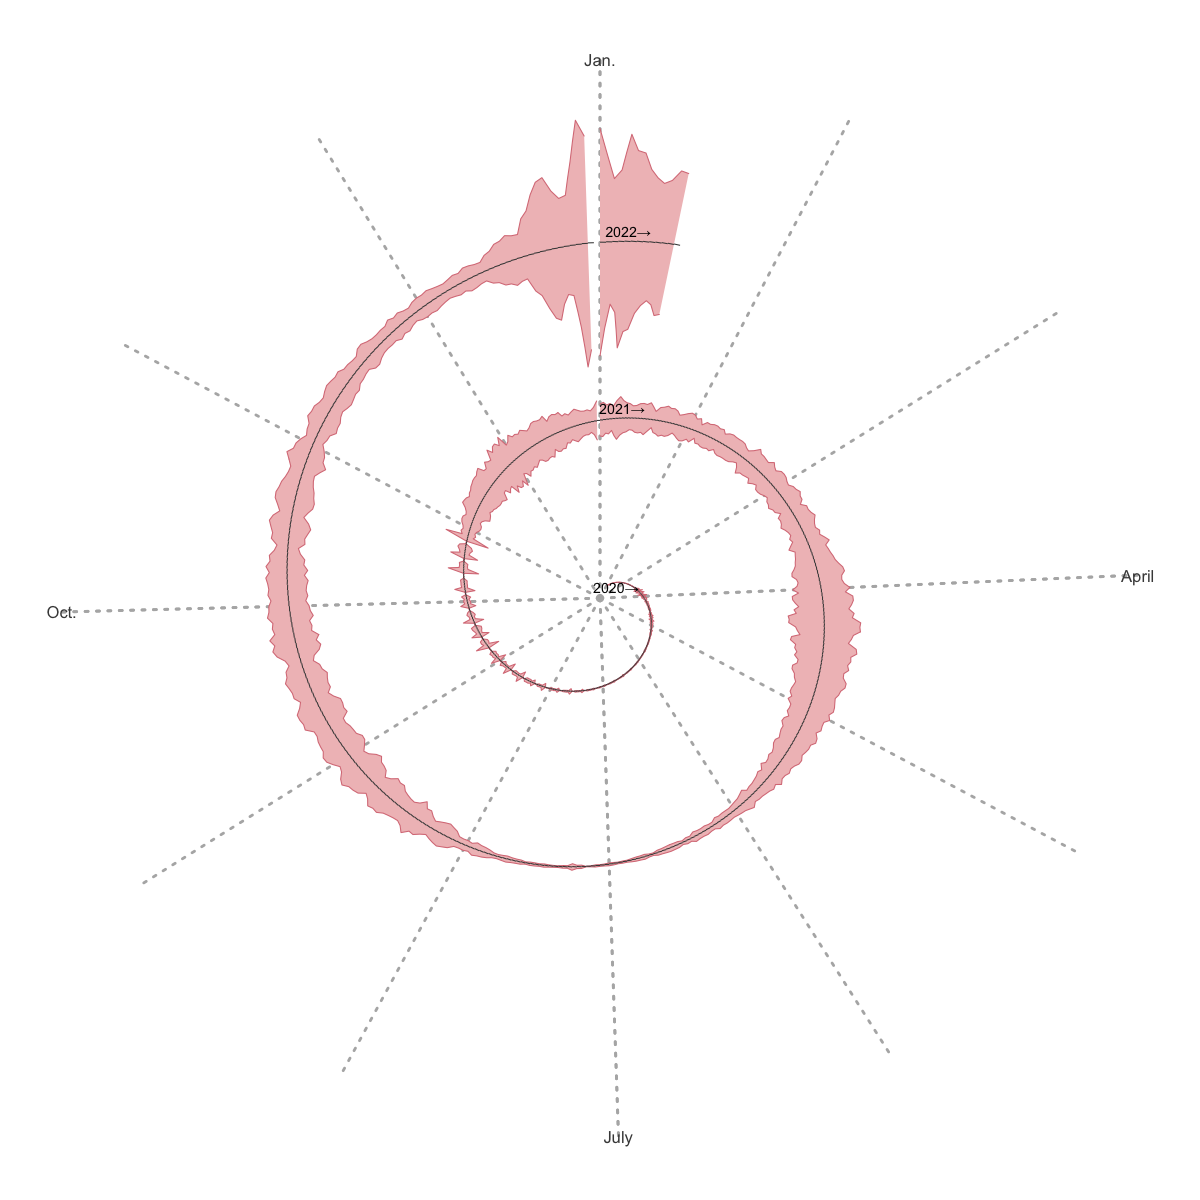

In [8]:
month_length <- c(31, 28, 31, 30, 31, 30,
                  31, 31, 30, 31, 30, 31) # the length of each month enumurated 

month_breaks <- cumsum(month_length) - 30

year_annotations <- list(
  year = 2020:2022,
  x = rep(3, 3),
  y = as.POSIXct(paste(2020:2022, "01", "01", sep = "-"))
)

data_plot + 
    scale_x_continuous(minor_breaks = month_breaks, 
                     breaks = month_breaks[c(1, 4, 7, 10)],
                     labels = c("Jan.", "April", "July", "Oct.")) +
    theme(
        plot.background = element_rect(color = NA, fill = "white"),
        panel.grid.major.x = element_line(color = "grey70", size = 0.8, linetype = "dotted"),
        panel.grid.minor.x = element_line(color = "grey70", size = 0.8, linetype = "dotted"),
        axis.text.x = element_text(color = base_grey, size = 10, hjust = 0.5),) +
    annotate("text", label = paste0(year_annotations$year, "\u2192"), x = year_annotations$x, 
        y = year_annotations$y,
        size = 3, vjust = -0.6, hjust = 0.15) 